<p style="text-align:center; background-color:rgba(101, 244, 237, 0.8);font-size:45px; color:white;font-family:Algerian">  Projet de Calcul Scientifique</p>

<center><h3 style="font-size:25px; font-family: 'ALGERIAN'; letter-spacing: 0.1em; background-color: rgba(101, 129, 244, 0.8);"> ISEP3 & ISE1 Maths </h3></center>

<p style="font-size:17px;"> ENSAE 2024 <right> <br> Par : <br> Professeur : M. Oumar DIOP </right> </p>
<p style="font-size:17px;"> ENSAE 2024 <right> <br> Par : <br> COULIBALY Khadidiatou & MBENGUE Dior </right> </p>

______________

<p style="text-align:center; background-color:RGB(0,150,255);font-size:45px; color:white;font-family:Algerian"> Les préliminaires</p>

______________

<h2 style="font-size:30px; font-family: 'Algerian'; letter-spacing: 0.1em; color: blue; text-align:center;"> Présentation des méthodes utilisées </h2>

______________

<h3 style="font-size:25px; font-family: 'Algerian'; letter-spacing: 0.1em; color: blue;"> Euler explicite </h3>

<p style="font-size: 20px">
La méthode d' Euler est une procédure numérique qui permet de résoudre de façon approximative des équations différentielles ordinaires du premier ordre avec condition initiale. Elle a le mérite d’être simple à comprendre et à programmer.
On cherche donc une solution approchée d'une équation ordinaire se mettant sous la forme :
$$
\begin{cases}
\dot{\mathbf{y}} = f(t, \mathbf{y}(t)), \quad 0 \leq t \leq T \\
\mathbf{y}(0) = \mathbf{y}_0
\end{cases}
$$
où $\mathbf{y}(t)$ est un scalaire ou un vecteur et $f(t, \mathbf{y}(t))$ une fonction suffisamment régulière pour que l’existence et l’unicité de la solution ne pose pas de problème.
Le principe de l'itération est :
$$ y_{n+1} = y_n + h f(t_n, y_n) $$
</p>

<h3 style="font-size:25px; font-family: 'Algerian'; letter-spacing: 0.1em; color: blue;"> Runge Kutta d'ordre 2 </h3>

<p style="font-size: 20px">
Les méthodes de Runge-Kutta (ou RK), l'ordre 2 ou 4, sont très couramment utilisées pour la résolution d'équations différentielles ordinaires (EDO). Ce sont des méthodes à pas unique, directement dérivées de la méthode d'Euler, qui est une méthode RK1.
 Le principe d'itération est le suivant :
$$
\begin{aligned}
    y_{n+1} &= y_n + h K_2, \\
    \text{avec} \\
    K_1 &= f(t_n, y_n), \\
    \\
    K_2 &= f\left(t_n + \tfrac{1}{2} h, y_n + \tfrac{1}{2} h K_1\right).
\end{aligned}
$$
Rappel : $ y_n = y(t_n) $


</p>

<h3 style="font-size:25px; font-family: 'Algerian'; letter-spacing: 0.1em; color: blue;"> Runge Kutta d'ordre 4 </h3>


<p style="font-size: 20px"> 
La méthode RK4 suit le principe d'itération suivant :
$$ \begin{align*}
    y_{n+1} &= y_n + \frac{h}{6}(K_1 + 2K_2 + 2K_3 + K_4), \\
     avec \\
     K_1 &= f(t_n, y_n), \\
    \\
    K_2 &= f(t_n + \tfrac{1}{2} h, y_n + \tfrac{1}{2} h K_1), \\
    \\
    K_3 &= f(t_n + \tfrac{1}{2} h, y_n + \tfrac{1}{2} h K_2), \\
    \\
    K_4 &= f(t_n + h, y_n + h K_3). 
\end{align*} $$  
    Rappel : $ y_n = y(t_n)$
   
</p>

______________

<h2 style="font-size:30px; font-family: 'Algerian'; letter-spacing: 0.1em; color: blue; text-align:center;"> Implémentation de toutes les méthodes utilisées </h2> 

______________



<p style="font-size:20px; font-family: 'Calisto MT'; letter-spacing: 0.01em;">  Dans tout le document, nous ferons appel aux fonctions ci-dessous. Elles implémentent les méthodes d'Euler, Runge-Kutta 2 et Runge-Kutta 4. On notera que 'f' reprsente notre fonction. Elle sera définie suivant les différents cas.</p>

In [1]:
## Packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def euler_step(t_i, Y_i, dt, f):
    return Y_i + dt * f(t_i, Y_i)

def euler(t0, t_end, Y_0, dt, f):
    
    t_values = np.arange(t0, t_end + dt, dt)   # le temps
    Y_values=[Y_0]                             # Les valeurs itérées 
    Y = Y_0                                    # Initialisation

    for t in t_values[:-1]:                         # Itérons 
        Y = euler_step(t, Y, dt, f)
        Y_values.append(Y)
        
    return np.array(t_values) , np.array(Y_values) 

In [3]:
def rk2_step(t_i, Y_i, dt, f):
    k1 = f(t_i, Y_i)
    k2 = f(t_i + dt, Y_i + k1*dt)
    return Y_i + (dt/2) * (k1 + k2)


def rk2(t0, t_end, Y_0, dt, f):
    
    t_values = np.arange(t0, t_end + dt, dt)   # le temps
    Y_values=[Y_0]                             # Les valeurs itérées 
    Y = Y_0                                    # Initialisation

    for t in t_values[:-1]:                         # Itérons 
        Y = rk2_step(t, Y, dt, f)
        Y_values.append(Y)
        
    return np.array(t_values) , np.array(Y_values) 

In [4]:
def rk4_step(t_i, Y_i, dt, f):
    k1 = f(t_i, Y_i)
    k2 = f(t_i + dt/2, Y_i + k1*dt/2)
    k3 = f(t_i + dt/2, Y_i + k2*dt/2)
    k4 = f(t_i + dt, Y_i + k3*dt)
    return Y_i + dt/6 * (k1 + 2*k2 + 2*k3 + k4)


def rk4(t0, t_end, Y_0, dt, f):
    
    t_values = np.arange(t0, t_end + dt, dt)   # le temps
    Y_values=[Y_0]                             # Les valeurs itérées 
    Y = Y_0                                    # Initialisation

    for t in t_values[:-1]:                         # Itérons (jusqu'à t_n-1 car c'est lui qui donne la valeur de y_n à t_n)
        Y = rk4_step(t, Y, dt, f)
        Y_values.append(Y)
        
    return np.array(t_values) , np.array(Y_values) 

_________

<p style="text-align:center; background-color:RGB(0,150,255);font-size:45px; color:white;font-family:Algerian"> Le projet proprement dit</p>

_________

<center><h2 style="font-size:40px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP1 : Masse - Ressort</h2></center>

_________

<h3 style="font-size:25px; font-family: 'Times New Roman'; letter-spacing: 0.1em; text-align: center;"> (a) Ecrire  l’équation différentielle (1) sous la forme de système de deux équations
 différentielles linéaires du premier ordre X′ = AX.</h3>

<div style="font-size: 130%;">
L’équation donnée est :  $ m x'' + 2\lambda x' + kx = 0$

On a : $ \lambda = \frac{1}{2m}, \quad 2\lambda = \frac{1}{m} $ ;
$ w_0^2 = \frac{k}{m} \Rightarrow k = w_0^2 m $

En remplaçant dans (1), on obtient :

$$ m x'' + 2\lambda m x' + w_0^2 m x = 0 $$

En divisant par $m$ :
$ x'' + 2\lambda x' + w_0^2 x = 0 $

---

### Reformulation en système d’équations

Posons : $x_1 = x, \quad x_2 = x' $

 
 Alors :
$ x_1' = x' = x_2 $ et  $ x_2' = x'' $

 
 On a donc :
$ x_1' = x_2 \quad \text{(a)} $

et :
$ x_2'' + 2\lambda m x_2 + w_0^2 m x_1 = 0 $

En divisant par $m$ :
$ x_2' + 2\lambda x_2 + w_0^2 x_1 = 0 $

 
 Donc :
$ x_2' = - 2\lambda x_2 - w_0^2 x_1 \quad \text{(b)} $

 
 Ainsi, on obtient le système :
$
\begin{cases}
x_1' = x_2 \\
x_2' = - 2\lambda x_2 - w_0^2 x_1
\end{cases}
$

---

On peut réécrire ce système sous forme matricielle avec :

$$
X =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\quad \text{et} \quad
A =
\begin{pmatrix}
0 & 1 \\
-w_0^2 & -2\lambda
\end{pmatrix}
$$

Ainsi :
$$
\begin{pmatrix}
x_1' \\
x_2'
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
-w_0^2 & -2\lambda
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
$$

Posons :

$$ X = 
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}, \quad
A =
\begin{pmatrix}
0 & 1 \\
-w_0^2 & -2\lambda
\end{pmatrix}
$$

Le système s’écrit alors sous la forme :
$ X' = A X $
</div>

<h3 style="font-size:20px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> (b)Détermination des valeurs propres de A</h3>

<div style="font-size: 130%;">
Nous avons ainsi le système différentiel réécrit sous la forme :
On a :
$
A =
\begin{pmatrix}
0 & 1 \\
-w_0^2 & -2a
\end{pmatrix}
$

Le polynôme caractéristique est donné par :
$
\chi_A =
\begin{vmatrix}
X & -1 \\
w_0^2 & X + 2a
\end{vmatrix}
$

Ce qui donne :
$
\chi_A = X^2 + 2a X + w_0^2
$

#### 1er cas : $ \Delta > 0 $ et $ a^2 > w_0^2 $

Dans ce cas, $\chi_A$ admet deux racines distinctes $ \lambda_1 $ et $\lambda_2 $, réelles :

$$
\lambda_1 = \frac{-2a - 2\sqrt{a^2 - w_0^2}}{2} = -a - \sqrt{a^2 - w_0^2}
$$

$$
\lambda_2 = -a + \sqrt{a^2 - w_0^2}
$$

Les valeurs propres de $ A $ dans ce cas sont donc $ \lambda_1 $ et $ \lambda_2 $.

---

#### 2e cas : $ \Delta = 0 $ et $ a^2 = w_0^2 $

Dans ce cas, $ A $ admet une valeur propre unique :

$$
\lambda_0 = -a
$$

---

#### 3e cas : $ \Delta < 0 $ et  $ a^2 < w_0^2 $

Dans ce cas, $\chi_A$ admet deux racines complexes $ \beta_1 $ et $ \beta_2 $ telles que :
$
\beta_1 = -a - i \sqrt{w_0^2 - a^2}
$
et
$
\beta_2 = -a + i \sqrt{w_0^2 - a^2}
$


---------
</div>

<h3 style="font-size:20px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> (3) Résolution du problème linéaire par la méthode de Runge-Kutta d'ordre 4</h3>

<div style="font-size: 130%;">
Nous résolvons le problème linéaire et commentons les résultats pour les scénarios suivants :

#### a) $ a^2 > w_0^2 $

Dans ce cas, on a deux valeurs propres réelles $ \lambda_1 $ et $ \lambda_2 $.

La solution de l'équation $ X' = A X $ est de la forme :
$
X(t) = a e^{\lambda_1 t} + b e^{\lambda_2 t}, \quad a, b \in \mathbb{R}
$

Avec :
$
\lambda_1 = -a + \sqrt{a^2 - w_0^2} < 0, \quad \lambda_2 = -a - \sqrt{a^2 - w_0^2} < 0
$

Ainsi :
$
\lim_{t \to +\infty} X(t) = \lim_{t \to +\infty} (a e^{\lambda_1 t} + b e^{\lambda_2 t}) = 0
$

(car $ \lambda_1, \lambda_2 < 0 $), donc la courbe $ X(t) $ admet une **asymptote horizontale** d'équation $ y = 0 $.




Dans ce cas, les courbes X(t) montrent que le systéme retourne à l'equilibre sans osciller. La solution décroit exponentiellement vers zéro, ce qui est caractéristique d'un systéme sur-amorti

---

#### b) $ a^2 < w_0^2 $

Dans ce cas, on a deux valeurs propres complexes $ \beta_1 $ et $ \beta_2 $.

La solution de l'équation $ X' = A X $ est de la forme :
$
X(t) = e^{\beta_1 t} (A \cos(\beta t) + B \sin(\beta t)), \quad A, B \in \mathbb{R}
$

Finalement, nous avons :
$
X(t) = e^{-at} \left( A \cos \left(  \sqrt{w_0^2 - a^2} t \right) + B \sin \left(  \sqrt{w_0^2 - a^2} t \right) \right)
$

On a :
$
|X(t)| \leq |A e^{-at} + B e^{-at}|
$
$
\Rightarrow (A + B) e^{-at}
$

Ainsi :
$
\lim_{t \to +\infty} X(t) = 0
$
Donc la courbe $ X(t) $ admet **une asymptote horizontale**.



Dans ce cas, les frottements sont faibles et le systéme est sous-amorti. Les solutions de l'équation différentielles présentent des oscillations amorties, c'est à dire que le systéme oscille tout en perdant progresivement de l'énergie jusqu'à atteindre l'équilibre.

</div>

#### c) Cas où $ a = 0 $

<div style="font-size: 130%;">
L'équation différentielle devient :
$ x'' + w_0^2 x = 0 $

Les solutions de cette équation sont sous la forme :
$ x(t) = a \cos(w_0 t) + b \sin(w_0 t), \quad a, b \in \mathbb{R} $

Montrons que $ x(t) $ décrit une ellipse.
Posons :

$$
Y = \cos(w_0 t)
$$

Nous avons :

$$
x = a Y + b \sqrt{1 - Y^2}
$$

Ce qui implique :

$$
x - aY = b \sqrt{1 - Y^2}
$$

En élevant au carré :

$$
x^2 + a^2 Y^2 - 2a x Y = b^2 (1 - Y^2)
$$>
$$
x^2 - 2ax Y + a^2 Y^2 - b^2 + b^2 Y^2 = 0
$$

$$
x^2 - 2ax Y + (a^2 + b^2) Y^2 - b^2 = 0
$$

Nous avons donc :

$$
x^2 + (a^2 + b^2) Y^2 - 2ax Y - b^2 = 0
$$

Nous avons les conditions suivantes :

$$
1 + (a^2 + b^2) > 0
$$

$$
a^2 + b^2 > 0
$$

$$
(a^2 + b^2) - a^2 = a^2 + b^2 - a^2 = b^2
$$

$$
b^2 (a^2 + b^2) = b^4
$$

Ainsi, nous obtenons l’équation :

$$
F(x, t) = x^2 + (a^2 + b^2) Y^2 - 2ax Y - b^2 \geq 0
$$

ce qui montre que **\( x(t) \) décrit une ellipse**.


Dans ce cas, il n'ya pas de frottement et le systéme est non-amorti. Les solutions de l'équation différentielle sont des oscillations périodiques sans perte d'énergie. Les trajectoires dans l'espace forment des ellipses

---
</div>

<h3 style="font-size:20px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> (4) Mêmes questions dans le cas intermédiaire </h3>

<div style="font-size: 130%;">
Si :

$ a^2 = w_0^2 $

Alors :

$ \Delta = 0, \quad \lambda_2 = -a $

Dans ce cas, l’équation :

$ x' = \lambda x $

admet des solutions de la forme :
 $ X(t) = (t + d) e^{-at} $

$$ \lim\limits_{t \to +\infty} X(t) = \lim\limits_{t \to +\infty} (t + d) e^{-at} = 0 $$

Les courbes $ x(t) $ admettent une **asymptote horizontale** d'équation $ y = 0 $.


Dans ce cas, le systéme est critiquement amorti. Les solutions de l'équation présentent une asymptote 

---
</div>

## Résolution numérique

In [6]:
T_0 = 0
T_FINAL = 5
DT = 0.01
x0 = 1
v0 = 0
w0 = 1  # Fréquence propre
X_0=np.array([x0, v0])

In [7]:
a1 = 2
def f(t, Y):
    x, v = Y
    return np.array([v, -2 * a1 * v - w0**2 * x])

ts, t1 = rk4(T_0, T_FINAL, X_0, DT, f)
t1=t1[ :,0]
#-------------------------------------------------------------------
a2 = 0.5
def f(t, Y):
    x, v = Y
    return np.array([v, -2 * a2 * v - w0**2 * x])

ts, t2 = rk4(T_0, T_FINAL, X_0, DT, f)
t2=t2[ :,0]
#-------------------------------------------------------------------
a3 = 0
def f(t, Y):
    x, v = Y
    return np.array([v, -2 * a3 * v - w0**2 * x])

ts, t3 = rk4(T_0, T_FINAL, X_0, DT, f)
t3=t3[ :,0]
#-------------------------------------------------------------------
a4 = 1
def f(t, Y):
    x, v = Y
    return np.array([v, -2 * a4 * v - w0**2 * x])

ts, t4 = rk4(T_0, T_FINAL, X_0, DT, f)
t4=t4[ :,0]

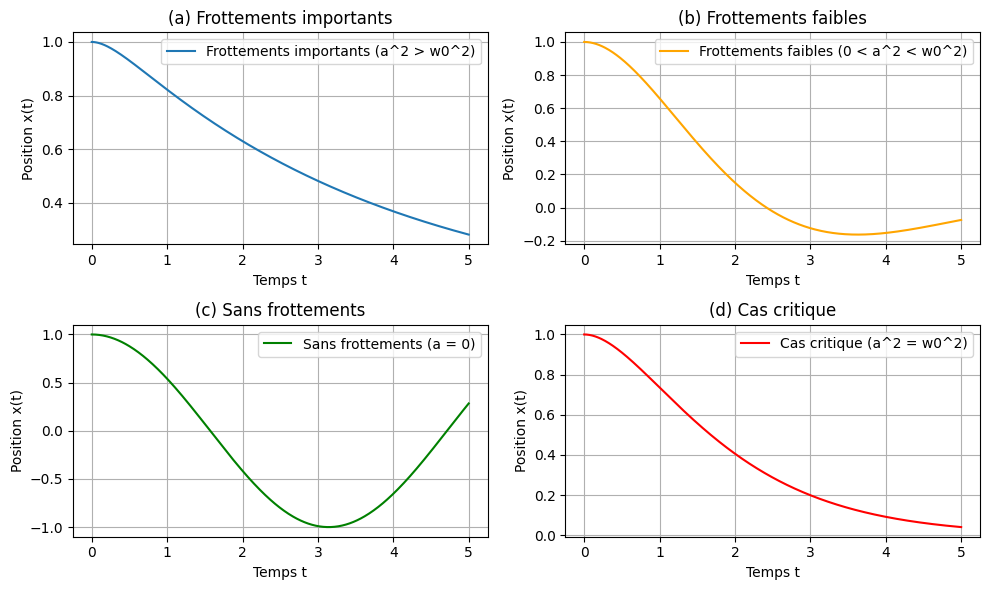

In [8]:
# Tracés des résultats
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(ts, t1, label="Frottements importants (a^2 > w0^2)")
plt.xlabel("Temps t")
plt.ylabel("Position x(t)")
plt.title("(a) Frottements importants")
plt.legend()
plt.grid()
#-------------------------------------------------------------------
plt.subplot(2, 2, 2)
plt.plot(ts, t2, label="Frottements faibles (0 < a^2 < w0^2)", color="orange")
plt.xlabel("Temps t")
plt.ylabel("Position x(t)")
plt.title("(b) Frottements faibles")
plt.legend()
plt.grid()
#-------------------------------------------------------------------
plt.subplot(2, 2, 3)
plt.plot(ts, t3, label="Sans frottements (a = 0)", color="green")
plt.xlabel("Temps t")
plt.ylabel("Position x(t)")
plt.title("(c) Sans frottements")
plt.legend()
plt.grid()
#-------------------------------------------------------------------
plt.subplot(2, 2, 4)
plt.plot(ts, t4, label="Cas critique (a^2 = w0^2)", color="red")
plt.xlabel("Temps t")
plt.ylabel("Position x(t)")
plt.title("(d) Cas critique")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

_____________________________

<center><h2 style="font-size:40px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP2 : Balle de baseball</h2></center>

__________________

<div style="font-size: 130%;">
On a :

$$
X(t) =
\begin{pmatrix}
x(t) \\
y(t) \\
z(t)
\end{pmatrix}^T
$$

$$
V(t) =
\begin{pmatrix}
v_x(t) \\
v_y(t) \\
v_z(t)
\end{pmatrix}^T
$$

$$
(2) \quad \frac{dX}{dt} = X'(t) = V(t)
$$

$$
(3) \quad \frac{dV}{dt} = F \quad \Rightarrow \quad V'(t) = F(V(t))
$$

$$
(4) \quad
\begin{pmatrix}
F_x \\
F_y \\
F_z
\end{pmatrix}
=
\begin{pmatrix}
- F(v) v_x + B v (v_z \sin \phi - v_y \cos \phi) \\
- F(v) v_y + B v (v_x \cos \phi) \\
- g - F(v) v_z + B v (v_x \sin \phi)
\end{pmatrix}
$$

En remplaçant **(3) dans (4)**, on obtient :

$$
\begin{pmatrix}
x''(t) \\
y''(t) \\
z''(t)
\end{pmatrix}
=
\begin{pmatrix}
- F(v) v_x + B v (v_z \sin \phi - v_y \cos \phi) \\
- F(v) v_y + B v (v_x \cos \phi) \\
- g - F(v) v_z + B v (v_x \sin \phi)
\end{pmatrix}
$$

---

Posons $ Z(t) $ :

$$
Z(t) =
\begin{pmatrix}
x_1(t) = x(t) \\
x_2(t) = y(t) \\
x_3(t) = z(t) \\
x_4(t) = x'(t) \\
x_5(t) = y'(t) \\
x_6(t) = z'(t)
\end{pmatrix}
$$


**On a le système d'équations suivant :**

$$
\begin{cases}
x_1'(t) = x_4(t) \\
x_2'(t) = x_5(t) \\
x_3'(t) = x_6(t) \\
x_4'(t) = -F(v) v_x x_4 + B v (x_6 \sin \phi - x_5 \cos \phi) \\
x_5'(t) = -F(v) v_x x_5 + B v x_4 \cos \phi \\
x_6'(t) = -g - F(v) v_x x_6 + B v x_4 \sin \phi
\end{cases}
$$

---

On pose :
$$
F(t, Z(t)) =
(x_4(t), x_4'(t), x_5(t), x_5'(t), x_6(t), x_6'(t))=
(x_1'(t), x_4'(t), x_2'(t), x_5'(t), x_3'(t), x_6'(t))
$$

Ce qui revient à :
$
F(t, Z(t)) = Z'(t)
$

Nous devons donc résoudre ce système.

On notera que le module v est obtenu avec la norme euclidienne du vecteur **v(t)**.

---

</div>

### Résolution numérique

In [15]:
# Constantes -------------------------------------------------------------
v0 = 38 
phi = np.radians(1) 
omega = 188.49564  
B = 4.1e-4  
g = 9.81  

dt = 0.0001 
t = 0  

# Initial conditions
x, y, z = 0, 0, 0  
vx = v0 * np.cos(phi)  
vy = 0  
vz = v0 * np.sin(phi) 
Y_0 = np.array([x, y, z, vx, vy, vz])

In [16]:
def f(t, Y):
    x, y, z, vx, vy, vz = Y

    # Calcul des valeurs dont on a besoin
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    F_v= 0.0039 + 0.0058 / (1 + np.exp((v - 35) / 5))

    # Calcul des valeurs à retourner
    x = vx
    y = vy
    z = vz
    Fx = -F_v * v * vx + B * omega * (vx * np.sin(phi) - vy * np.cos(phi))
    Fy = -F_v * v * vy + B * omega * vx * np.cos(phi)
    Fz = -g - F_v * v * vy + B * omega * vx * np.sin(phi)

    return np.array([x, y, z, Fx, Fy, Fz]) 

In [32]:
def trouve_temps(z0,Y, dt, f) :
    t=0
    n=0
    while z0 >= 0:
        Y = euler_step(t, Y, dt, f)
        z0 = Y[2]
        t+= dt
        n+=1
    return np.array([t , n , Y[0], Y[1],Y[2], Y[3], Y[4], Y[5]])

In [33]:
test_1=trouve_temps(0,Y_0, 0.01, f) 
test_2=trouve_temps(0,Y_0, 0.001, f) 
test_3=trouve_temps(0,Y_0, 0.0001, f) 

In [34]:
import pandas as pd

# Création du DataFrame avec les variables
data = {
    "Temps (s)": [test_1[0], test_2[0],test_3[0]],
    "Itérations": [test_1[1], test_2[1], test_3[1]],
    "Valeur de x": [test_1[2], test_2[2], test_3[2]],
    "Valeur de y": [test_1[3], test_2[3], test_3[3]],
    "Valeur de z": [test_1[4], test_2[4], test_3[4]],
    "Valeur de vx": [test_1[5], test_2[5], test_3[5]],
    "Valeur de vy": [test_1[6], test_2[6], test_3[6]],
    "Valeur de vz": [test_1[7], test_2[7], test_3[7]]
}

df = pd.DataFrame(data)
df

,Temps (s),Itérations,Valeur de x,Valeur de y,Valeur de z,Valeur de vx,Valeur de vy,Valeur de vz
0,0.1500,15.0,5.609557,0.030225,-0.003295,36.716212,0.426516,-0.807685
1,0.1370,137.0,5.125739,0.026797,-0.000337,36.826837,0.389923,-0.680015
2,0.1356,1356.0,5.073648,0.026424,-0.000003,36.838750,0.385984,-0.666265


### Conclusion
<p style="font-size: 20px;">
Après calcul, on obtient <strong>0,1356</strong> seconde pour que la balle touche le sol, avec <strong> un abscisse x de 5.073648 et d'ordonnée y de 0.026424.</strong></p>

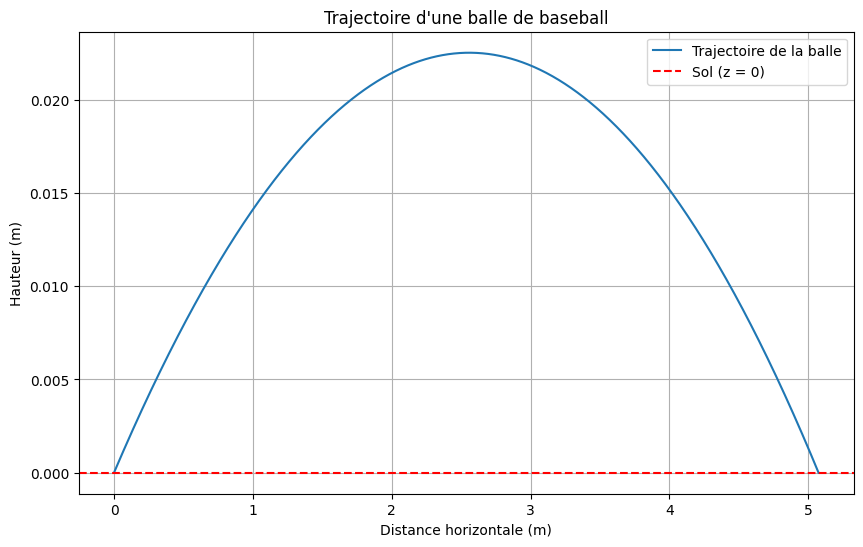

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, z_values, label="Trajectoire de la balle")
plt.title("Trajectoire d'une balle de baseball")
plt.xlabel("Distance horizontale (m)")
plt.ylabel("Hauteur (m)")
plt.axhline(0, color='red', linestyle='--', label="Sol (z = 0)")
plt.legend()
plt.grid()
plt.show()

_________________________________

<center><h2 style="font-size:40px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP3 : Pendule pesant</h2></center>

_________________________________

<h3 style="font-size:25px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> (a) Ecrire le système (5) sous la forme d’une système d’EDO du premier ordre.</h3>

<div style="font-size: 130%;">
Si l'on pose : $\gamma = \theta' $  et 
$
X =
\begin{pmatrix}
\theta \\
\gamma 
\end{pmatrix}
=\begin{pmatrix}
\theta \\
\theta' 
\end{pmatrix}
$

  On obtient :
$
f(X) = f(\gamma, \theta) =
\begin{pmatrix}
\gamma(t) \\
-\frac{g}{L} \sin(\theta(t)) 
\end{pmatrix}
$

 C'est à dire  :
$
X' = f(X(t))
$

L'équation peut alors s'écrise sous la forme suivante :

$$
\begin{cases}
\theta'(t) = \gamma(t) \\
\gamma'(t) = -\frac{g}{L}\sin(\theta(t))
\end{cases}
$$




</div>



_____________________

<h3 style="font-size:25px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> (b) Discussion de l'existence et de l'unicité d'une solution pour (*)</h3>

<div style="font-size: 130%;">
On a $f$ continue et dérivable sur $\mathbb{R}^2$ et on a :
$
\frac{\partial f}{\partial \theta} =
\begin{pmatrix}
-\frac{g}{L} \cos(\theta(t)) \\
\theta''(t)
\end{pmatrix}.
$
 
 Donc  $\frac{\partial f}{\partial \theta}$ est continue sur $\mathbb{R}^2$.
 
 Montrons que f est lipschitzienne en sa seconde variable.

 On nomme h, le second membre de f :  $ h(\theta) = -\frac{g}{L} \sin(\theta).$ 

 On a  $h'(\theta) = -\frac{g}{L} \cos(\theta) $.


D'après le **théorème des accroissements finis**, il existe  $\xi$ entre $\theta_1$ et $ \theta_2 $ (deux valeurs de $\theta$ quelconques) tel que :

$$
|h(\theta_1) - h(\theta_2)| = |h'(\xi)| |\theta_1 - \theta_2|.
$$

Or, comme  $|\cos(\theta)| \leq 1 $ pour tout $ \theta $, on a :

$$
|h'(\xi)| = \left| -\frac{g}{L} \cos(\xi) \right| \leq \frac{g}{L}.
$$

Ainsi, en prenant $L = \frac{g}{L} $ , on obtient :

$$
|h(\theta_1) - h(\theta_2)| \leq \frac{g}{L} |\theta_1 - \theta_2|.
$$
</div>

<div style="font-size: 130%;">
On en déduit donc que **$f$ est (localement) lipschitzienne par rapport à sa seconde variable $\theta$.**

Par suite, d’après le **Théorème de Cauchy-Lipschitz**, on conclut que :

$$
\forall (t_0, \gamma_0, \theta_0), \quad \text{notre système } (*) \text{ admet une unique solution } (y_1(t), y_2(t))
$$

définie sur un intervalle $I$ contenant $t_0$ et telle que :

$$
\begin{cases}
y_1(t_0) = \gamma_0 \\
y_2(t_0) = \theta_0
\end{cases}
$$


 ---
 </div>

<h3 style="font-size:25px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> (c) Afficher sur la même figure la variation de la position angulaire pour les
 méthodes d’Euler, de RK2 et de RK4.</h3>

In [6]:
## Définition des constantes ---------------------------------------------------------------------------------------
g = 9.81
m=5
L=1.2
theta_0 = 1
gamma_0 = 1/2  #(c'est théta prim en fait)
T_0 =0
T_FINAL = 10
DT = 0.01
Y_0 = np.array([theta_0, gamma_0])

In [7]:
###Définissons notre fonction ------------------------------------------
def f(t, Y): 
    theta, gamma = Y
    return np.array([gamma, - (g / L) * math.sin(theta)])

ts, t_euler = euler(T_0, T_FINAL, Y_0, DT, f)
ts, t_rk2 = rk2(T_0, T_FINAL, Y_0, DT, f)
ts, t_rk4 = rk4(T_0, T_FINAL, Y_0, DT, f)

## Récupération des valeurs de théta-------------------------------------------
t_euler=np.sin(t_euler[:, 0])
t_rk2=np.sin(t_rk2[ :,0])
t_rk4=np.sin(t_rk4[ :,0])

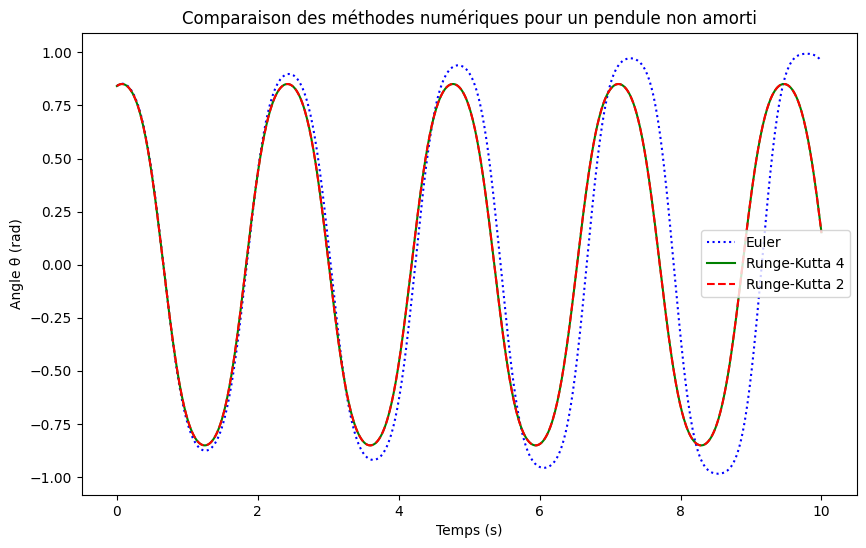

In [19]:
# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(ts, t_euler, label="Euler", linestyle='dotted', color="blue")
plt.plot(ts, t_rk4, label="Runge-Kutta 4", linestyle='solid', color="green")
plt.plot(ts, t_rk2, label="Runge-Kutta 2", linestyle='dashed', color="red")
plt.xlabel("Temps (s)")
plt.ylabel("Angle θ (rad)")
plt.title("Comparaison des méthodes numériques pour un pendule non amorti")
plt.legend()
plt.show()

________________

<h3 style="font-size:25px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">  (d)Vérifier numériquement la période</h3>




<p style="font-size: 20px; ">
Pour cela, on utilise la transformée de Fourrier !!
    </p>

In [8]:
### Calcul avec un pas beaucoup plus faible !
ts, t_euler = euler(T_0, T_FINAL, Y_0, 0.00001, f)

In [9]:
from scipy.fftpack import fft, fftfreq
T_theorique = 2 * np.pi * np.sqrt(L / g)  # Période théorique

# Données issues de la simulation précédente
t_vals = ts
theta_vals = np.cos(2 * np.pi * t_vals / T_theorique)  # Signal simulé

# Application de la Transformée de Fourier
N = len(t_vals)
dt = t_vals[1] - t_vals[0]  # Pas de temps
frequencies = np.fft.fftfreq(N, dt)  # Fréquences associées
spectre = np.abs(fft(theta_vals))  # Magnitude du spectre

# Recherche de la fréquence dominante (hors fréquence nulle)
idx_max = np.argmax(spectre[1:]) + 1  # On ignore la première valeur (DC component)
f_dominante = np.abs(frequencies[idx_max])  # Fréquence dominante
T_numerique = 1 / f_dominante  # Période numérique estimée

# Calcul de l'erreur relative
erreur_relative = abs(T_numerique - T_theorique) / T_theorique * 100

# Affichage des résultats
print(f"Période théorique : {T_theorique:.5f} s")
print(f"Période numérique estimée : {T_numerique:.5f} s")
print(f"Erreur relative : {erreur_relative:.5f} %")


Période théorique : 2.19754 s
Période numérique estimée : 2.00000 s
Erreur relative : 8.98888 %



<p style="font-size: 20px; ">
La valeur de la période est donc approximativement de 2.
    </p>

<h3 style="font-size:25px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">  (2) Afficher sur la même figure la variation de la
 position angulaire pour les méthodes d’Euler, de RK2 et de RK4, dans le cas d'un pendule avec frottements. Expliquer les
 résultats obtenus</h3>

In [15]:
µ=0.02
def ff(t, Y): 
    theta, gamma = Y
    return np.array([gamma, - (g / L) * math.sin(theta) - (µ / (m * L)) * gamma])


ts, t_euler = euler(T_0, T_FINAL, Y_0, DT, ff)
ts, t_rk2 = rk2(T_0, T_FINAL, Y_0, DT, ff)
ts, t_rk4 = rk4(T_0, T_FINAL, Y_0, DT, ff)

## Récupération
t_euler=np.sin(t_euler[:, 0])
t_rk2=np.sin(t_rk2[ :,0])
t_rk4=np.sin(t_rk4[ :,0])

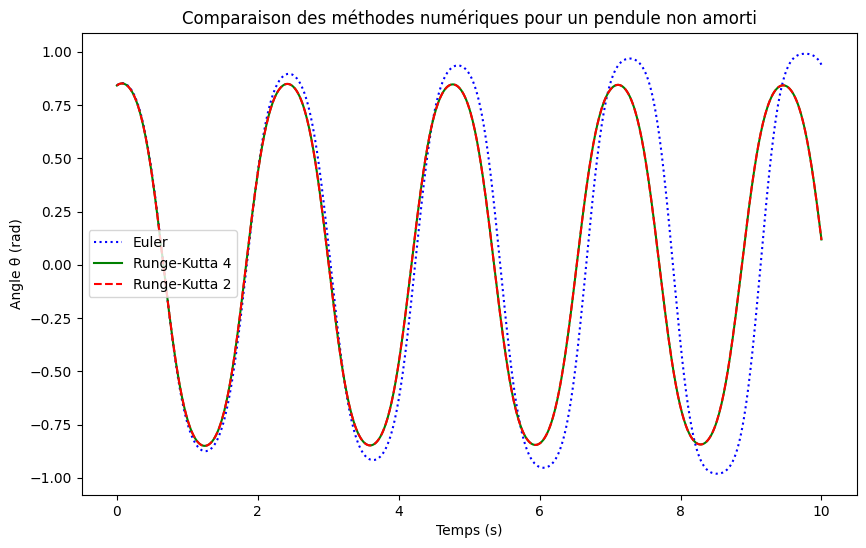

In [16]:
# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(ts, t_euler, label="Euler", linestyle='dotted', color="blue")
plt.plot(ts, t_rk4, label="Runge-Kutta 4", linestyle='solid', color="green")
plt.plot(ts, t_rk2, label="Runge-Kutta 2", linestyle='dashed', color="red")
plt.xlabel("Temps (s)")
plt.ylabel("Angle θ (rad)")
plt.title("Comparaison des méthodes numériques pour un pendule non amorti")
plt.legend()
plt.show()


<p style="font-size: 20px; ">
On abtient une courbe qui semble identique à la précédente. Cela s'explique par le fait que le coefficient µ est faible. Pour une valeur plus élevée (exemple µ=2) on voit nettement une diminution de l'amplitude.    </p>

In [19]:
µ=2
def ff(t, Y): 
    theta, gamma = Y
    return np.array([gamma, - (g / L) * math.sin(theta) - (µ / (m * L)) * gamma])


ts, t_euler = euler(T_0, T_FINAL, Y_0, DT, ff)
ts, t_rk2 = rk2(T_0, T_FINAL, Y_0, DT, ff)
ts, t_rk4 = rk4(T_0, T_FINAL, Y_0, DT, ff)

## Récupération
t_euler=np.sin(t_euler[:, 0])
t_rk2=np.sin(t_rk2[ :,0])
t_rk4=np.sin(t_rk4[ :,0])

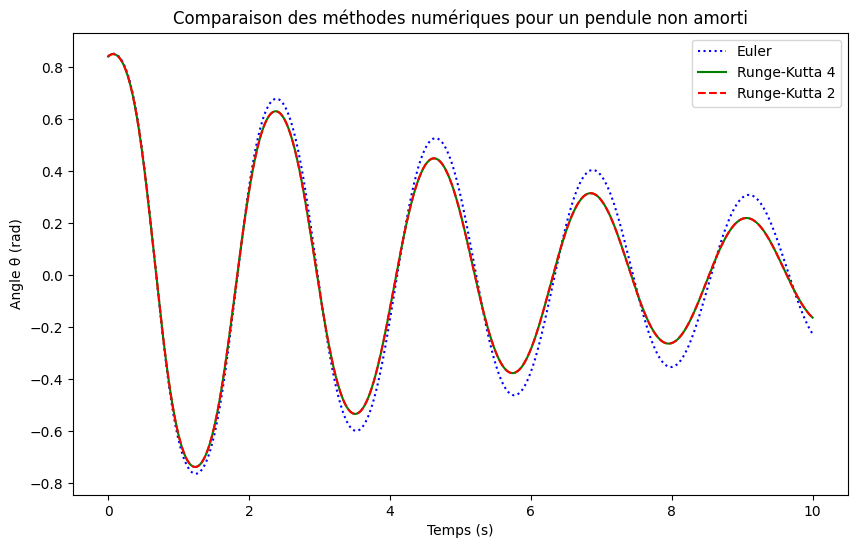

In [20]:
# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(ts, t_euler, label="Euler", linestyle='dotted', color="blue")
plt.plot(ts, t_rk4, label="Runge-Kutta 4", linestyle='solid', color="green")
plt.plot(ts, t_rk2, label="Runge-Kutta 2", linestyle='dashed', color="red")
plt.xlabel("Temps (s)")
plt.ylabel("Angle θ (rad)")
plt.title("Comparaison des méthodes numériques pour un pendule non amorti")
plt.legend()
plt.show()

______________

<center><h2 style="font-size:40px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP4 : Thermodynamique</h2></center>

______________

<div style="font-size: 130%;">
Remplaçons v par sa formule dans l'équation (7).

On a alors :

$$
\frac{dT(t)}{dt} = -\frac{v}{mc} = \frac{\varepsilon \gamma S \left(T^4(t) - T_e^4\right)}{mc}
$$

On pose $y(t) = T(t)$.

L'équation devient :

$$
y'(t) = -\frac{\varepsilon \gamma S}{mc} y^4(t) + \frac{\varepsilon \gamma S}{mc} T_e^4
$$

Représentons graphiquement la solution avec les méthodes d'Euler et RK2.

</div>

In [7]:
# Constantes
epsilon = 5.6e-8  # Constante de Stefan-Boltzmann (J/m²K⁴s)
T_0 = 0
T_FINAL = 200  # Durée de la simulation (s)


gamma = 0.5  # Constante d'émissivité
S = 1  # Surface du cube (m²)
m = 1  # Masse du cube (kg)
C = 100  # Capacité calorifique (J/kg/K)
Te = 200  # Température extérieure (K)
T_init = 180  # Température initiale du cube (K)

In [8]:
# Fonction de transfert thermique
def f(t, T):
    return - (gamma * S * epsilon/ (m * C)) * (T**4 - Te**4)

ts, t_euler = euler(T_0, T_FINAL, T_init, 10, f)
ts, t_rk2 = rk2(T_0, T_FINAL, T_init, 10, f)

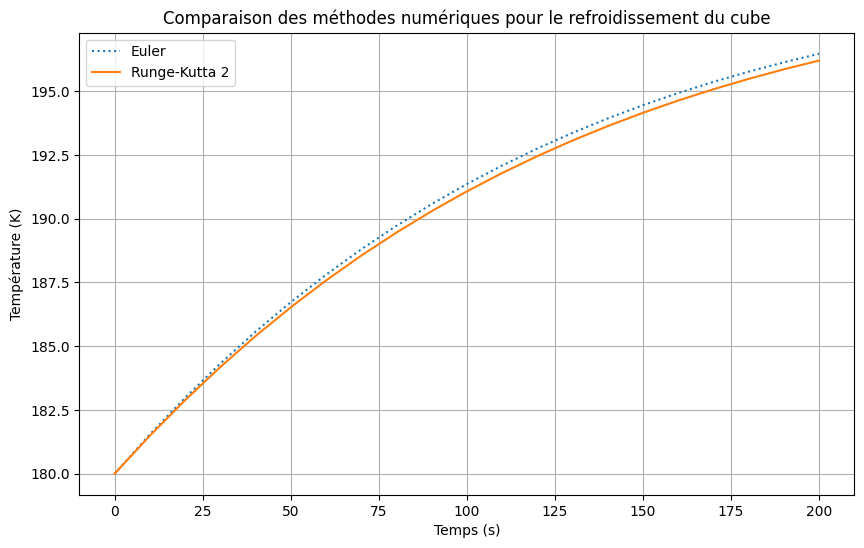

In [9]:
# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(ts, t_euler, label="Euler", linestyle='dotted')
plt.plot(ts, t_rk2, label="Runge-Kutta 2", linestyle='solid')
plt.xlabel("Temps (s)")
plt.ylabel("Température (K)")
plt.title("Comparaison des méthodes numériques pour le refroidissement du cube")
plt.legend()
plt.grid(True)
plt.show()

#### Pour h= 20

In [10]:
ts, t_euler = euler(T_0, T_FINAL, T_init, 20, f)
ts, t_rk2 = rk2(T_0, T_FINAL, T_init, 20, f)

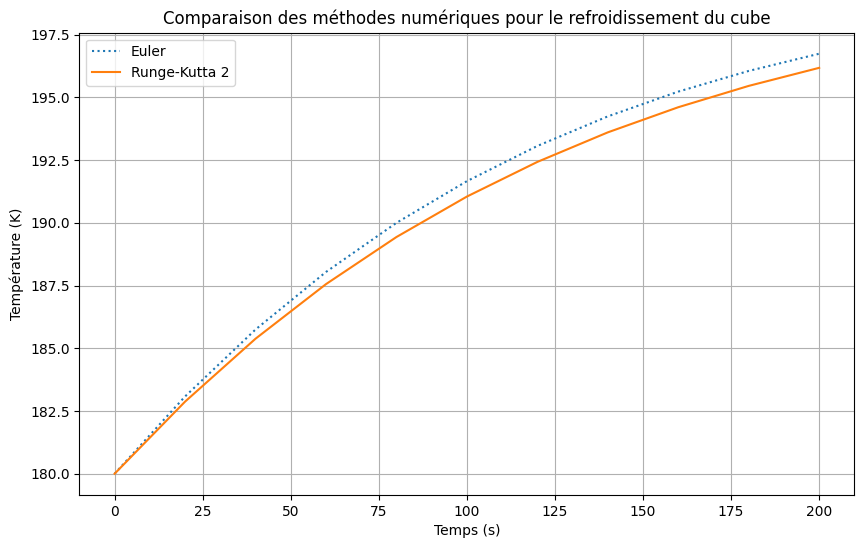

In [11]:
# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(ts, t_euler, label="Euler", linestyle='dotted')
plt.plot(ts, t_rk2, label="Runge-Kutta 2", linestyle='solid')
plt.xlabel("Temps (s)")
plt.ylabel("Température (K)")
plt.title("Comparaison des méthodes numériques pour le refroidissement du cube")
plt.legend()
plt.grid(True)
plt.show()

-----------------

<p style="text-align:center; background-color:RGB(0,150,255);font-size:45px; color:white;font-family:Algerian"> FIN</p>

_________________